<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/coorelation/folder/Vix_Risk_on_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [147]:
window_size=10

In [148]:
data=pd.read_csv('/content/vix.csv')

In [149]:
data.columns

Index(['time', 'open', 'high', 'low', 'close', 'INDIAVIX, NSE: Open',
       'INDIAVIX, NSE: High', 'INDIAVIX, NSE: Low', 'INDIAVIX, NSE: Close',
       'Volume', 'Volume MA'],
      dtype='object')

In [150]:
data=data[['time','close','INDIAVIX, NSE: Close']]

In [151]:
#data['vol']=data['close'].pct_change().rolling(window_size).std()*(252**0.5)*100

In [152]:
data['vix_ema']=data['INDIAVIX, NSE: Close'].ewm(span=7).mean()

In [153]:
data['signal']=data['INDIAVIX, NSE: Close']

In [154]:
data.tail(5)

,time,close,"INDIAVIX, NSE: Close",vix_ema,signal
1604,1663127100,18020.40,18.277500,18.282189,18.277500
1605,1663213500,17891.80,18.392500,18.309767,18.392500
1606,1663299900,17566.15,19.822500,18.687950,19.822500
1607,1663559100,17628.00,19.940001,19.000963,19.940001
1608,1663645500,17803.70,18.797500,18.950097,18.797500


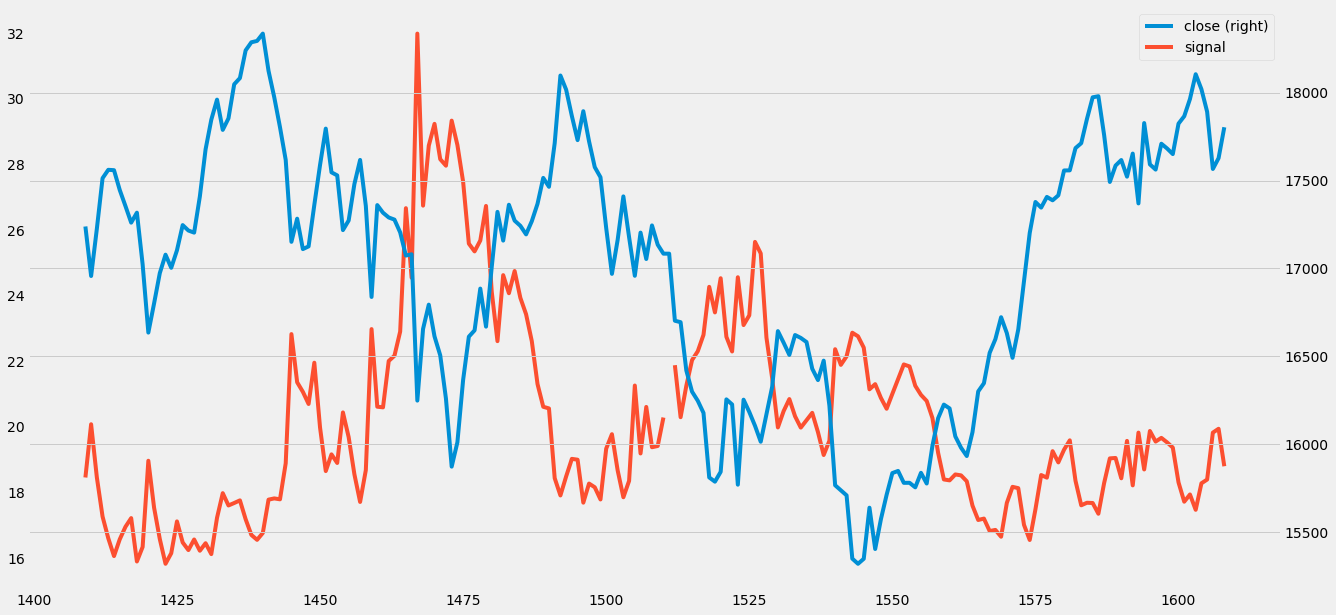

In [155]:
data[['close','signal']][-200:].plot(secondary_y='close');

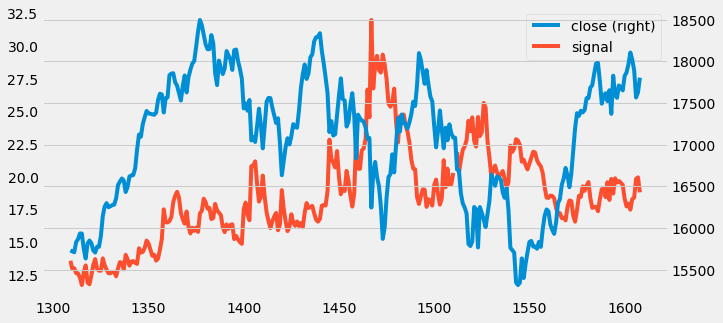

In [156]:
data[['close','signal']][-300:].plot(secondary_y='close',figsize=(10,5));

In [157]:
data_subset=data[['close','signal']]

In [158]:
data_subset.columns=['close','close1']

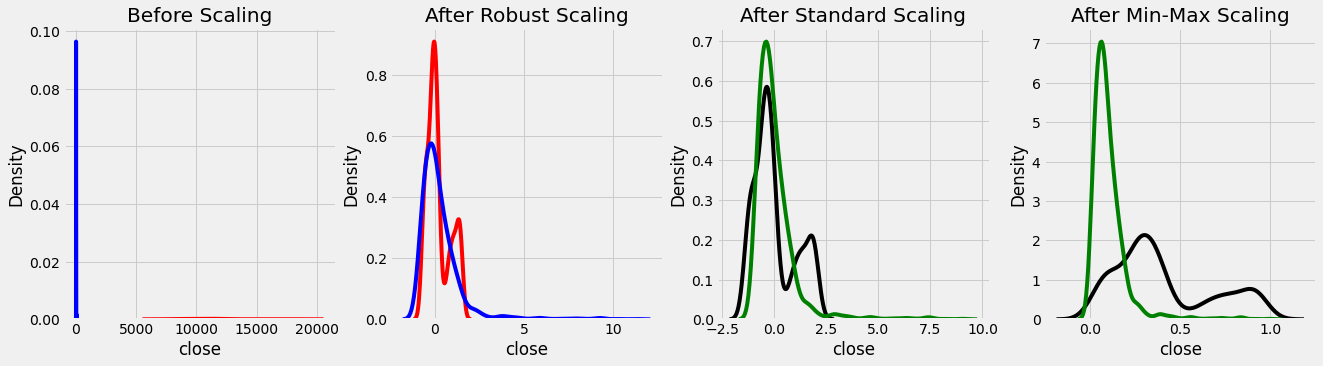

In [159]:
# Importing libraries
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

# data
x = data_subset
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['close','close1'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['close','close1'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['close','close1'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['close'], ax = ax1, color ='r')
sns.kdeplot(x['close1'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['close'], ax = ax2, color ='red')
sns.kdeplot(robust_df['close1'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['close'], ax = ax3, color ='black')
sns.kdeplot(standard_df['close1'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['close'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['close1'], ax = ax4, color ='g')
plt.show()


In [164]:
from pandas.core.common import standardize_mapping
standard_df['diff']=data_subset['close']/data_subset['close1']
standard_df['mov_avg']=standard_df['diff'].ewm(span=5).mean()
standard_df['mov_avg60']= standard_df['diff'].ewm(span=65).mean()
standard_df['std60'] = standard_df['mov_avg60'].std()
standard_df['abc'] = (standard_df['mov_avg']-standard_df['mov_avg60'])/standard_df['std60']
standard_df=standard_df[-1200:]

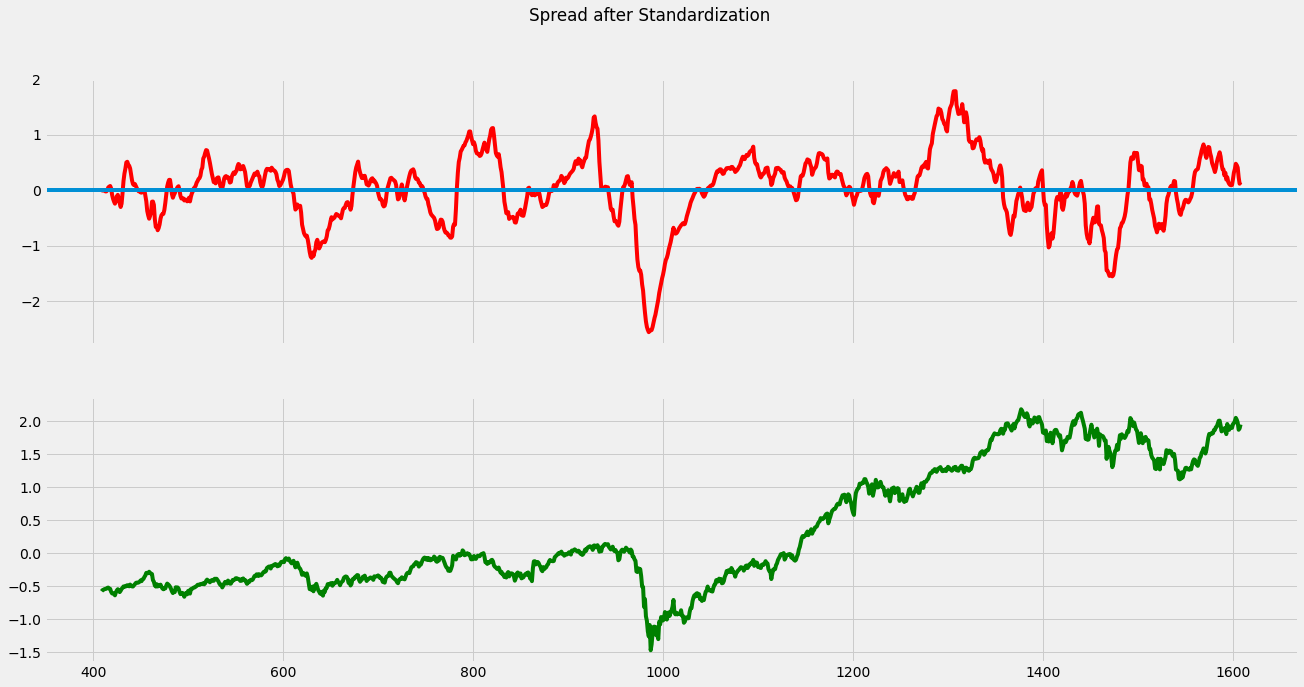

In [165]:
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(standard_df['abc'],color='r')
#ax[0].plot(standard_df['mov_avg'],color='c')
ax[0].axhline(y=0)
ax[1].plot(standard_df['close'],color='g')
plt.suptitle('Spread after Standardization')
plt.show()